In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file_path = 'data/cpu_usage_20251003_165704.csv' 
# Load the dataset
try:
    df = pd.read_csv(file_path)
    print("File loaded successfully!")
    print(f"{len(df)} rows of data found.")
    
    # Convert timestamp to datetime and set as index
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index('timestamp', inplace=True)

    # Set a nice style for plots
    sns.set_style("whitegrid")
    plt.rcParams['figure.figsize'] = (15, 7)

    df.head() # Display the first few rows to confirm it loaded correctly

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the path.")


File loaded successfully!
98 rows of data found.


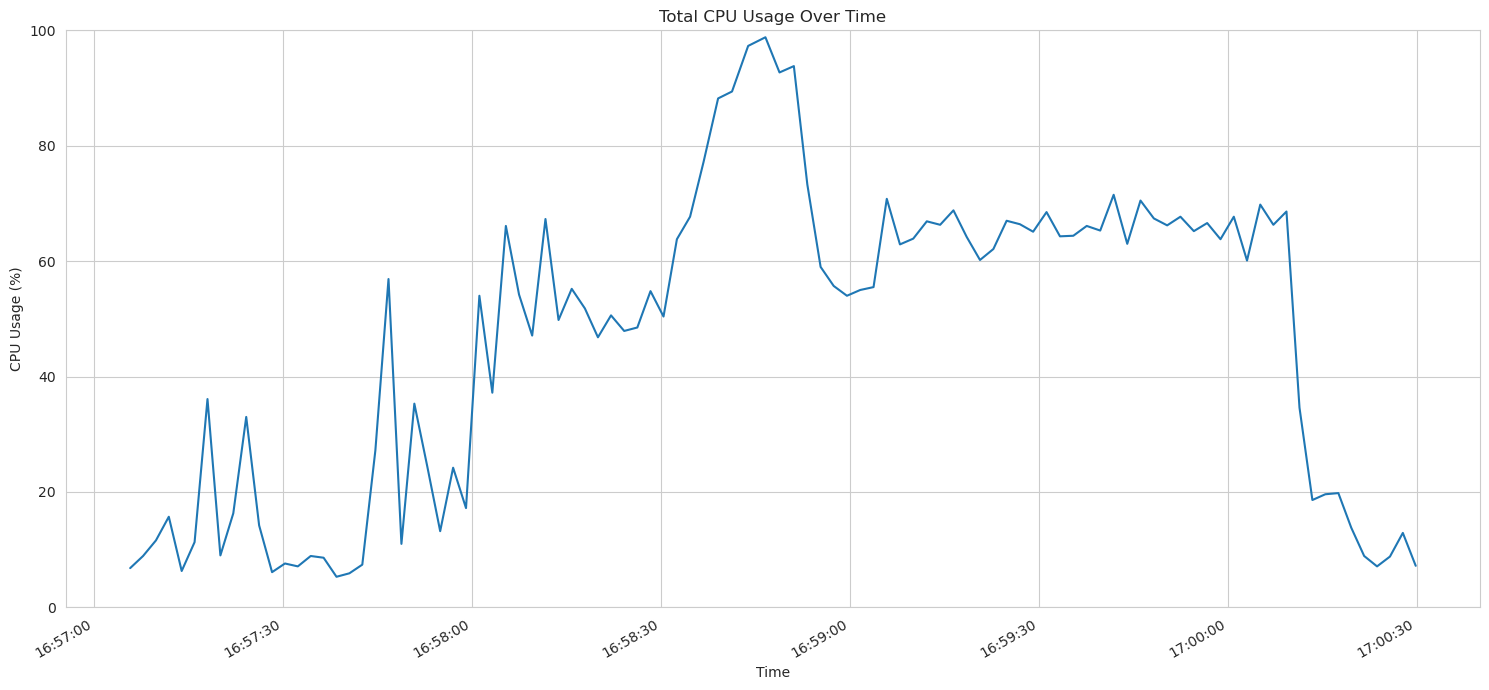

In [6]:
df['total_cpu_used'].plot(title='Total CPU Usage Over Time')
plt.ylabel('CPU Usage (%)')
plt.xlabel('Time')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

Found 6 instances of CPU usage > 80%.


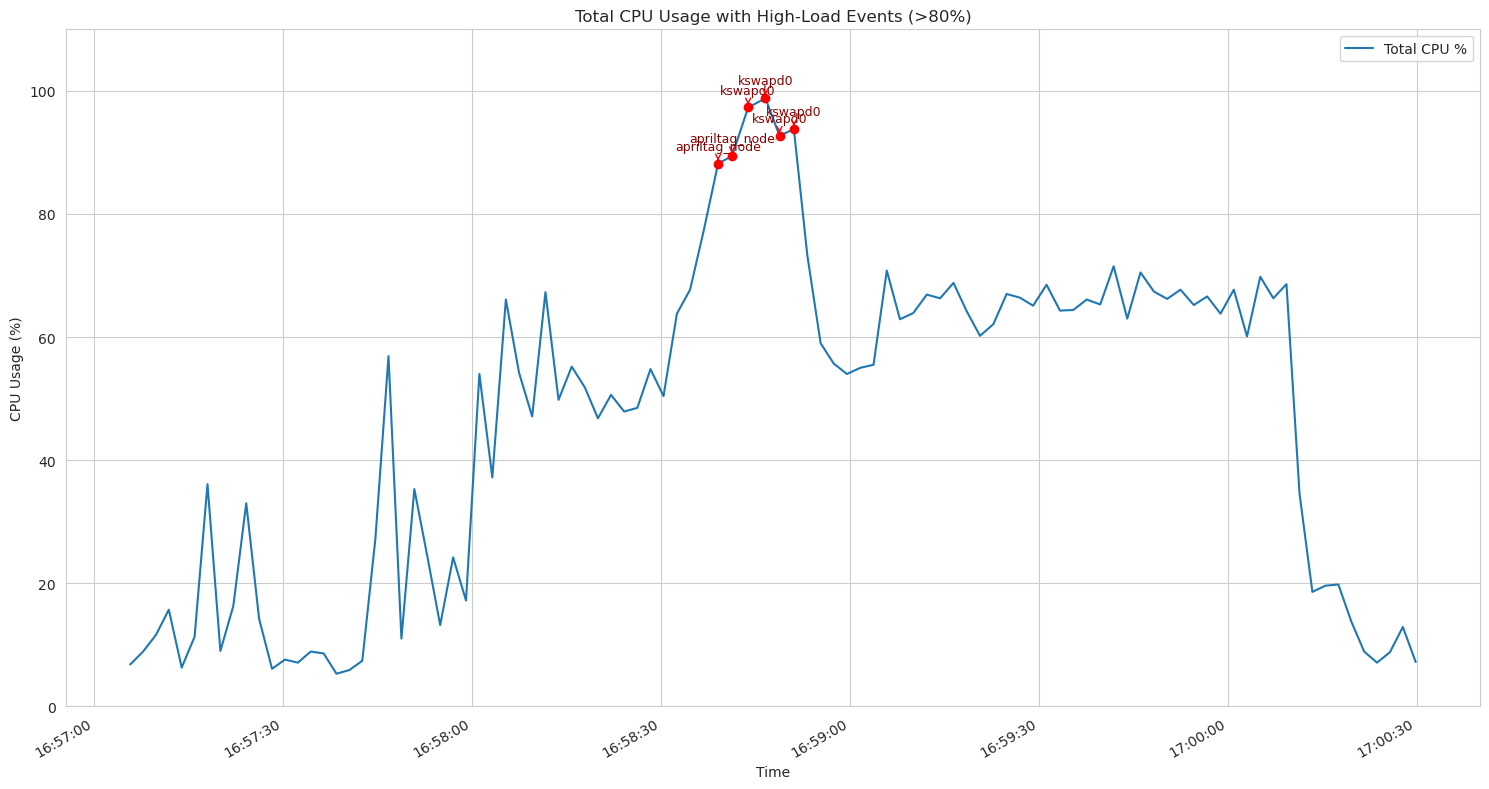

In [7]:
plt.figure(figsize=(15, 8))
# Plot the main CPU usage line
df['total_cpu_used'].plot(title='Total CPU Usage with High-Load Events (>80%)', label='Total CPU %', zorder=1)

# Find and annotate the high-usage points
high_usage_df = df[df['total_cpu_used'] > 80]

print(f"Found {len(high_usage_df)} instances of CPU usage > 80%.")

for timestamp, row in high_usage_df.iterrows():
    # Get the name of the top process
    try:
        top_proc_full = str(row['top_processes']).split(',')[0]
        top_proc_name = top_proc_full.split(':')[0]
    except (ValueError, IndexError):
        top_proc_name = 'N/A'
    
    # Add a red marker dot
    plt.plot(timestamp, row['total_cpu_used'], 'ro', zorder=2) 
    
    # Add the text annotation
    plt.annotate(
        top_proc_name,
        (timestamp, row['total_cpu_used']),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center',
        fontsize=9,
        color='darkred',
        arrowprops=dict(arrowstyle="->", color='red')
    )

plt.ylabel('CPU Usage (%)')
plt.xlabel('Time')
plt.ylim(0, 110) # Give some space for annotations at the top
plt.legend()
plt.tight_layout()
plt.show()

Found 50 instances of CPU usage between 50% and 80%.


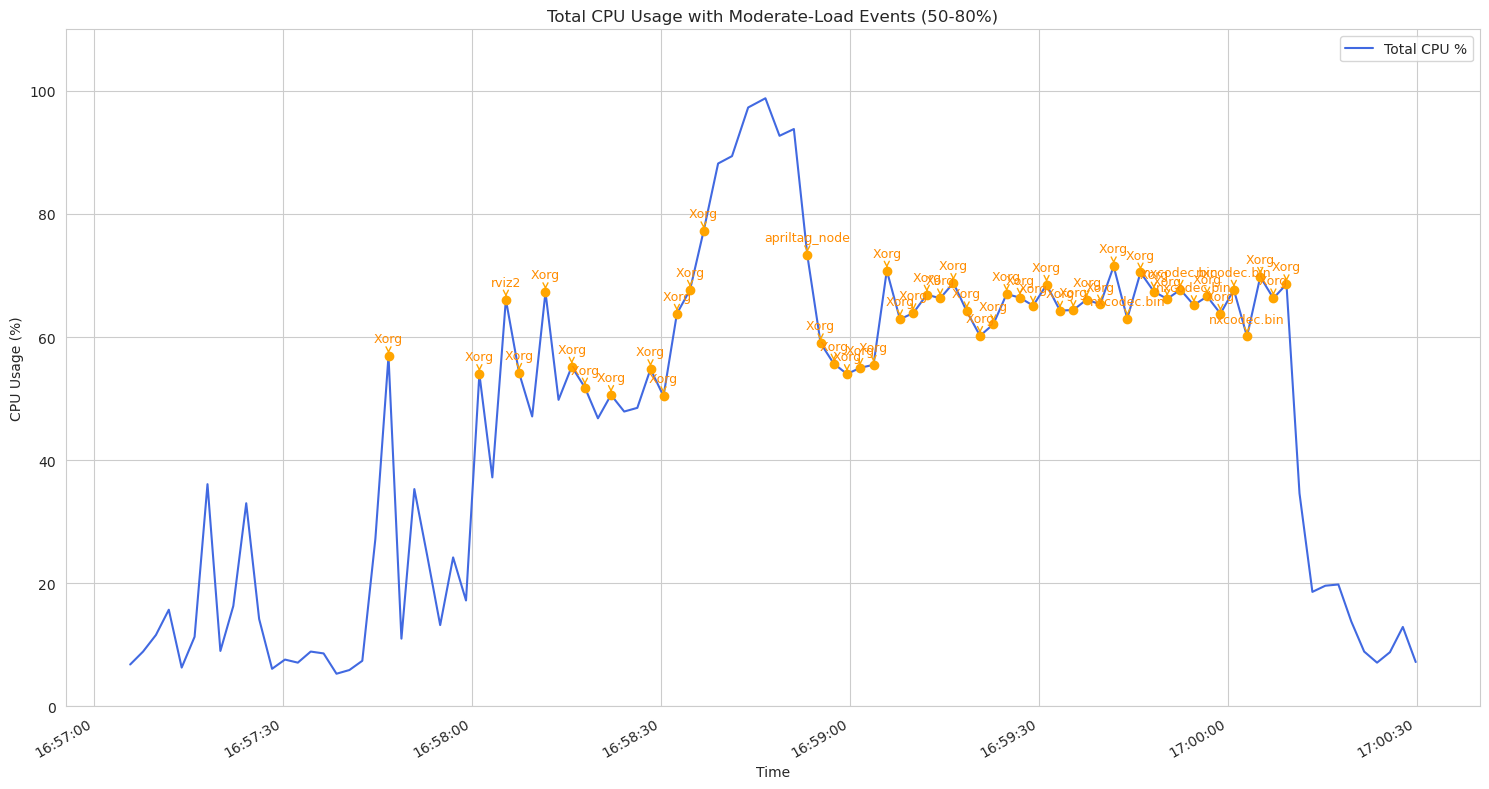

In [8]:
plt.figure(figsize=(15, 8))
# Plot the main CPU usage line
df['total_cpu_used'].plot(title='Total CPU Usage with Moderate-Load Events (50-80%)', label='Total CPU %', zorder=1, color='royalblue')

# Find and annotate the moderate-usage points
moderate_usage_df = df[(df['total_cpu_used'] > 50) & (df['total_cpu_used'] <= 80)]

print(f"Found {len(moderate_usage_df)} instances of CPU usage between 50% and 80%.")

for timestamp, row in moderate_usage_df.iterrows():
    # Get the name of the top process
    try:
        top_proc_full = str(row['top_processes']).split(',')[0]
        top_proc_name = top_proc_full.split(':')[0]
    except (ValueError, IndexError):
        top_proc_name = 'N/A'
    
    # Add an orange marker dot
    plt.plot(timestamp, row['total_cpu_used'], 'o', color='orange', zorder=2) 
    
    # Add the text annotation
    plt.annotate(
        top_proc_name,
        (timestamp, row['total_cpu_used']),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center',
        fontsize=9,
        color='darkorange',
        arrowprops=dict(arrowstyle="->", color='orange')
    )

plt.ylabel('CPU Usage (%)')
plt.xlabel('Time')
plt.ylim(0, 110) # Give some space for annotations at the top
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
processes_data = []

# Iterate over each row to parse the 'top_processes' column
for index, row in df.iterrows():
    processes = str(row['top_processes']).split(',')
    for proc in processes:
        try:
            name, percent = proc.split(':')
            processes_data.append({'name': name, 'cpu_percent': float(percent)})
        except ValueError:
            pass # Ignore malformed entries

if processes_data:
    # Convert list to a new DataFrame
    proc_df = pd.DataFrame(processes_data)

    # Group by process name and find the maximum CPU usage for each
    top_10_procs = proc_df.groupby('name')['cpu_percent'].max().sort_values(ascending=False).head(10)

    print("Top 10 Processes by Peak CPU Usage:")
    print(top_10_procs)

Top 10 Processes by Peak CPU Usage:
name
rviz2                      96.8
apriltag_node              96.4
kswapd0                    95.0
Xorg                       48.2
nxcodec.bin                45.9
nxnode.bin                 32.0
rectify_node               29.5
micro_ros_agent            28.7
teleop_twist_ke            22.2
async_slam_toolbox_node    21.6
Name: cpu_percent, dtype: float64
